<a href="https://colab.research.google.com/github/hmdfaiz/Analysis-on-a-Video-Sharing-Site-platform/blob/main/Analysis_on_a_Video_Sharing_Site_platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Store video category in list
categories = pd.read_json('/content/US_category_id.json')

In [ ]:
categories

In [ ]:
categories ['items']

In [ ]:
categories_dict = {}
for i in categories['items']:
  #print (i)
  categories_dict[i['id']] = i['snippet']['title']

In [ ]:
categories_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [ ]:
#Reading the actual data
df = pd.read_csv('/content/US_youtube_trending_data.csv')
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [ ]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,172990.000000,1.729900e+05,1.729900e+05,172990.000000,1.729900e+05
mean,18.818729,2.542014e+06,1.340012e+05,1762.408492,1.129776e+04
std,6.762113,7.079620e+06,4.131588e+05,9975.656989,8.591946e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.850428e+05,1.932400e+04,0.000000,1.363000e+03
50%,20.000000,9.906300e+05,4.478500e+04,212.000000,3.052000e+03
75%,24.000000,2.236278e+06,1.121958e+05,1047.000000,7.284000e+03
max,29.000000,2.777917e+08,1.602153e+07,879354.000000,6.738537e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172990 entries, 0 to 172989
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           172990 non-null  object
 1   title              172990 non-null  object
 2   publishedAt        172990 non-null  object
 3   channelId          172990 non-null  object
 4   channelTitle       172990 non-null  object
 5   categoryId         172990 non-null  int64 
 6   trending_date      172990 non-null  object
 7   tags               172990 non-null  object
 8   view_count         172990 non-null  int64 
 9   likes              172990 non-null  int64 
 10  dislikes           172990 non-null  int64 
 11  comment_count      172990 non-null  int64 
 12  thumbnail_link     172990 non-null  object
 13  comments_disabled  172990 non-null  bool  
 14  ratings_disabled   172990 non-null  bool  
 15  description        169062 non-null  object
dtypes: bool(2), int64(5)

In [ ]:
#Check the number of records of random video: 2kyS6SvSYSE get from df.head(1)
df[df.video_id == 'gim2kprjL50']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
129790,gim2kprjL50,Official Trailer | She-Hulk: Attorney at Law |...,2022-05-17T21:54:57Z,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2022-05-19T00:00:00Z,marvel|comics,15479134,655053,0,42402,https://i.ytimg.com/vi/gim2kprjL50/default.jpg,False,False,You’ll like her when she’s angry.She-Hulk: Att...
129990,gim2kprjL50,Official Trailer | She-Hulk: Attorney at Law |...,2022-05-17T21:54:57Z,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2022-05-20T00:00:00Z,marvel|comics,17376750,689468,0,46489,https://i.ytimg.com/vi/gim2kprjL50/default.jpg,False,False,You’ll like her when she’s angry.She-Hulk: Att...
130194,gim2kprjL50,Official Trailer | She-Hulk: Attorney at Law |...,2022-05-17T21:54:57Z,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2022-05-21T00:00:00Z,marvel|comics,18691943,708761,0,48630,https://i.ytimg.com/vi/gim2kprjL50/default.jpg,False,False,You’ll like her when she’s angry.She-Hulk: Att...
130423,gim2kprjL50,Official Trailer | She-Hulk: Attorney at Law |...,2022-05-17T21:54:57Z,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2022-05-22T00:00:00Z,marvel|comics,19445157,721987,0,49020,https://i.ytimg.com/vi/gim2kprjL50/default.jpg,False,False,You’ll like her when she’s angry.She-Hulk: Att...
130668,gim2kprjL50,Official Trailer | She-Hulk: Attorney at Law |...,2022-05-17T21:54:57Z,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2022-05-23T00:00:00Z,marvel|comics,19880172,730399,0,50288,https://i.ytimg.com/vi/gim2kprjL50/default.jpg,False,False,You’ll like her when she’s angry.She-Hulk: Att...
130919,gim2kprjL50,Official Trailer | She-Hulk: Attorney at Law |...,2022-05-17T21:54:57Z,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2022-05-24T00:00:00Z,marvel|comics,20245088,737163,0,50576,https://i.ytimg.com/vi/gim2kprjL50/default.jpg,False,False,You’ll like her when she’s angry.She-Hulk: Att...
131165,gim2kprjL50,Official Trailer | She-Hulk: Attorney at Law |...,2022-05-17T21:54:57Z,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2022-05-25T00:00:00Z,marvel|comics,20508954,741858,0,50608,https://i.ytimg.com/vi/gim2kprjL50/default.jpg,False,False,You’ll like her when she’s angry.She-Hulk: Att...
131372,gim2kprjL50,Official Trailer | She-Hulk: Attorney at Law |...,2022-05-17T21:54:57Z,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2022-05-26T00:00:00Z,marvel|comics,20715920,745306,0,51020,https://i.ytimg.com/vi/gim2kprjL50/default.jpg,False,False,You’ll like her when she’s angry.She-Hulk: Att...


In [ ]:
df.video_id.nunique()

31904

Though the number of entries are 172989, the number of unique videos are 31904

In [ ]:
df.channelTitle.nunique()

6927

In [ ]:
#df.rename({'views':'view_count'}, axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172990 entries, 0 to 172989
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           172990 non-null  object
 1   title              172990 non-null  object
 2   publishedAt        172990 non-null  object
 3   channelId          172990 non-null  object
 4   channelTitle       172990 non-null  object
 5   categoryId         172990 non-null  int64 
 6   trending_date      172990 non-null  object
 7   tags               172990 non-null  object
 8   view_count         172990 non-null  int64 
 9   likes              172990 non-null  int64 
 10  dislikes           172990 non-null  int64 
 11  comment_count      172990 non-null  int64 
 12  thumbnail_link     172990 non-null  object
 13  comments_disabled  172990 non-null  bool  
 14  ratings_disabled   172990 non-null  bool  
 15  description        169062 non-null  object
dtypes: bool(2), int64(5)

In [ ]:
df.drop(['thumbnail_link', 'channelId'], inplace = True, axis =1)

In [ ]:
#Converting two date time columns to approriate formats
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [ ]:
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

In [ ]:
df['description'] = df['description'].fillna('No description provided')

In [ ]:
#df[df['title'] == 'I ASKED HER TO BE MY GIRLFRIEND...']

In [ ]:
#Drop Duplicate of videos
df = df.drop_duplicates('title', keep = 'last')

In [ ]:
#For further analysis, let's gather enough details
#df_maxViews stores the last occurance of video_id, gathering final views, like, comments before relegating from Trending Data
#df_minViews strores the data of a video entering into trending videos for the first time

df_maxViews = df.sort_values ('view_count', ascending = False).drop_duplicates(['video_id'])
df_minViews = df.sort_values ('view_count', ascending = True).drop_duplicates(['video_id'])

In [ ]:
df_maxViews.head(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,BLACKPINK,10,2022-09-10 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21 03:46:13+00:00,HYBE LABELS,10,2021-05-30 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,Big Hit Labels,10,2020-08-28 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03 04:04:57+00:00,FFUNTV,24,2021-08-08 00:00:00+00:00,[None],206202284,6840430,240769,2826,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
4980,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28 04:00:11+00:00,BLACKPINK,10,2020-09-05 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795670,879354,2735997,False,False,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...


In [ ]:
df_minViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
70959,5QLFrE2qSZo,Lil Nas X - INDUSTRY BABY (Prelude),2021-07-19 15:22:38+00:00,Lil Nas X,10,2021-07-26 00:00:00+00:00,lil nas x|nike|satan shoes|lilnasx,3689583,265041,6563,14161,False,False,Pre-Save / Pre-Add Lil Nas X Industry Baby fea...
59572,ilv0MfN9TsM,Jungle Queen (Clash of Clans June Season Chall...,2021-06-01 07:58:20+00:00,Clash of Clans,20,2021-06-07 00:00:00+00:00,clash of clans|COC|Clash of Clans Gameplay|Cla...,7259765,138556,3785,5112,False,False,It's another new Season stacked with amazing p...
127582,8dJyRm2jJ-U,PSY - 'That That (prod. & feat. SUGA of BTS)' MV,2022-04-29 09:00:10+00:00,officialpsy,10,2022-05-07 00:00:00+00:00,PSY|싸이|psy|Psy|박재상|Comeback|coming back|9th|PS...,111477556,6496912,0,353082,False,False,PSY - 'That That (prod. & feat. SUGA of BTS)' ...
38164,JYZdZcqebaE,We Try EVERY Buffalo Wild Wings Flavor,2021-02-16 11:00:05+00:00,Good Mythical Morning,24,2021-02-22 00:00:00+00:00,gmm|good mythical morning|rhettandlink|rhett a...,1885508,62978,890,3695,False,False,"Today, we're eating ALL THE WINGS!!! GMM # 190..."
44941,CLqIu_DbDFY,Ranking My Gay Crushes!,2021-03-22 21:10:10+00:00,AmazingPhil,22,2021-03-28 00:00:00+00:00,amazingphil|phil|lester|crushes|funny|ranking|...,285922,43509,207,5001,False,False,"I rank the gay crushes of my life, judging if ..."


In [ ]:
categories ['items'][4]['snippet']['title']

'Sports'

In [ ]:
#df[df.category_id == 43]
#df_maxViews[df_maxViews.category_id == 43]
#df_minViews[df_minViews.category_id == 43]

In [ ]:
#Check before made changes
#df[df.video_id == 'lM0yu7c6lQk']
#f[df.video_id == '7_FJUSBFbJM']

In [ ]:
#df.loc[(df["category_id"] == 43) & (df["channel_title"] == 'CNET'), "category_id"] = 15
#df.loc[(df["category_id"] == 43) & (df["channel_title"] == 'Bleacher Report'), "category_id"] = 4
#df_maxViews.loc[(df_maxViews["category_id"] == 43) & (df_maxViews["channel_title"] == 'CNET'), "category_id"] = 15
#df_maxViews.loc[(df_maxViews["category_id"] == 43) & (df_maxViews["channel_title"] == 'Bleacher Report'), "category_id"] = 4
#df_minViews.loc[(df_minViews["category_id"] == 43) & (df_minViews["channel_title"] == 'CNET'), "category_id"] = 15
#df_minViews.loc[(df_minViews["category_id"] == 43) & (df_minViews["channel_title"] == 'Bleacher Report'), "category_id"] = 4

In [ ]:
#Check the changes made
#df[df.video_id == '7_FJUSBFbJM']

In [ ]:
def fetch_video_category(value):
  return categories ['items'][value]['snippet']['title']

In [ ]:
#add the categories to the various dataframe
df_maxViews["Video_Category"]=df_maxViews.categoryId.apply(fetch_video_category)
df_minViews["Video_Category"]=df_minViews.categoryId.apply(fetch_video_category)
df["Video_Category"] = df.categoryId.apply(fetch_video_category)

In [ ]:
#Check the changes made
#df[df.video_id == 'lM0yu7c6lQk']
#df[df.video_id == '7_FJUSBFbJM']

In [ ]:
df.sample(5)

In [ ]:
df.Video_Category.value_counts()

Classics                6514
Family                  6382
Comedy                  5217
Movies                  3937
Documentary             2891
Drama                   1692
Foreign                 1236
Autos & Vehicles        1227
Thriller                1020
Horror                   903
Sci-Fi/Fantasy           784
Music                    599
Action/Adventure         165
Science & Technology     138
Shorts                    18
Name: Video_Category, dtype: int64

In [ ]:
#Channel with the most view count
df_View_Analysis = df_maxViews.groupby('Video_Category')['view_count'].sum().reset_index()
df_Like = df_maxViews.groupby('Video_Category')['likes'].sum().reset_index()
df_Dislikes = df_maxViews.groupby('Video_Category')['dislikes'].sum().reset_index()
df_Comments = df_maxViews.groupby('Video_Category')['comment_count'].sum().reset_index()
df_View_Analysis ['Likes'] = df_Like.likes
df_View_Analysis ['Dislikes'] = df_Dislikes.dislikes
df_View_Analysis

,Video_Category,view_count,Likes,Dislikes
0,Action/Adventure,217836277,11294999,66928
1,Autos & Vehicles,3198762719,129779169,1274890
2,Classics,12151157257,606804041,7120121
3,Comedy,25505564288,1469282577,19596440
4,Documentary,5841054206,319910703,5908457
5,Drama,3144941002,220095879,2196117
6,Family,18827848028,893129464,10599207
7,Foreign,1904458083,25884725,1720301
8,Horror,1377062822,66555348,1349838
9,Movies,6804810075,154788144,2711623


In [ ]:
channel_group_df = df.groupby(by = df['channelTitle']).sum()

In [ ]:
channel_group_df [channel_group_df['view_count'] == channel_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
channelTitle,,,,,,,
MrBeast,1536,2149516488,132712770,996627,7588531,0,0


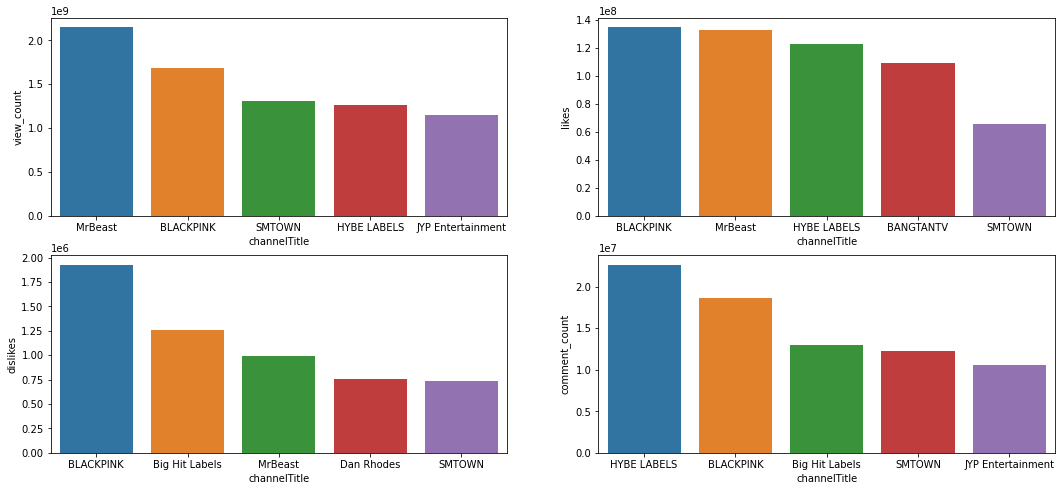

In [ ]:
#Plotting the 5 channels with largest view_count, likes, dislikes, comment_count
plt.figure(figsize  = (18,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
  plt.subplot(2,2,i+1)
  x = channel_group_df[var_list[i]].nlargest(5).index
  y = channel_group_df[var_list[i]].nlargest(5)
  sns.barplot(x = x, y = y)

In [ ]:
#Most watched category
category_group_df = df.groupby(by = df['Video_Category']).sum()
category_group_df

In [ ]:
category_group_df [category_group_df['view_count'] == category_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Comedy,52170,25911984710,1497559645,19947926,151659509,15,22


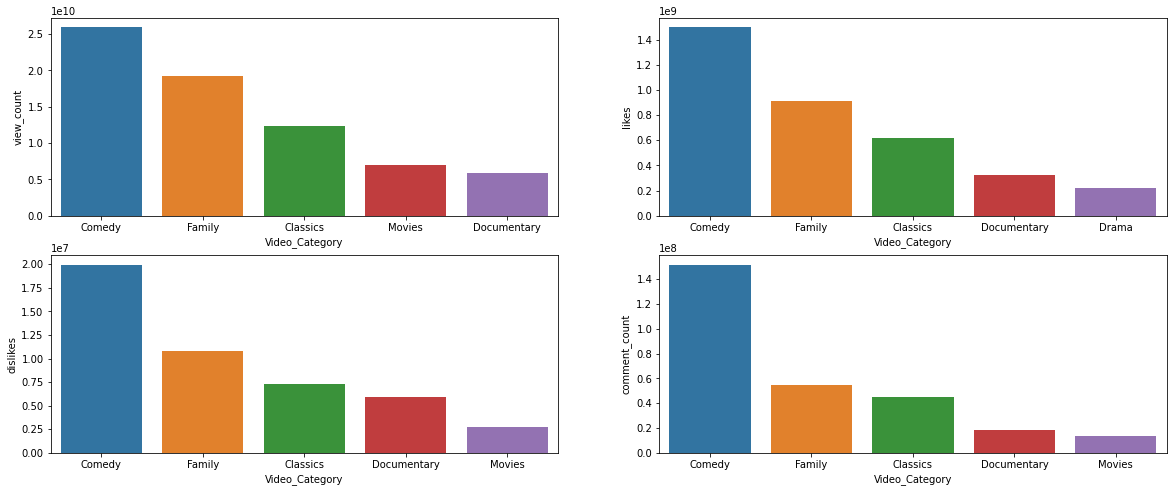

In [ ]:
#Plotting the 5 categories with largest view_count, likes, dislikes, comment_count
plt.figure(figsize  = (20,8))
plt.subplot(2,2,1)

#var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
  plt.subplot(2,2,i+1)
  x = category_group_df[var_list[i]].nlargest(5).index
  y = category_group_df[var_list[i]].nlargest(5)
  sns.barplot(x = x, y = y)

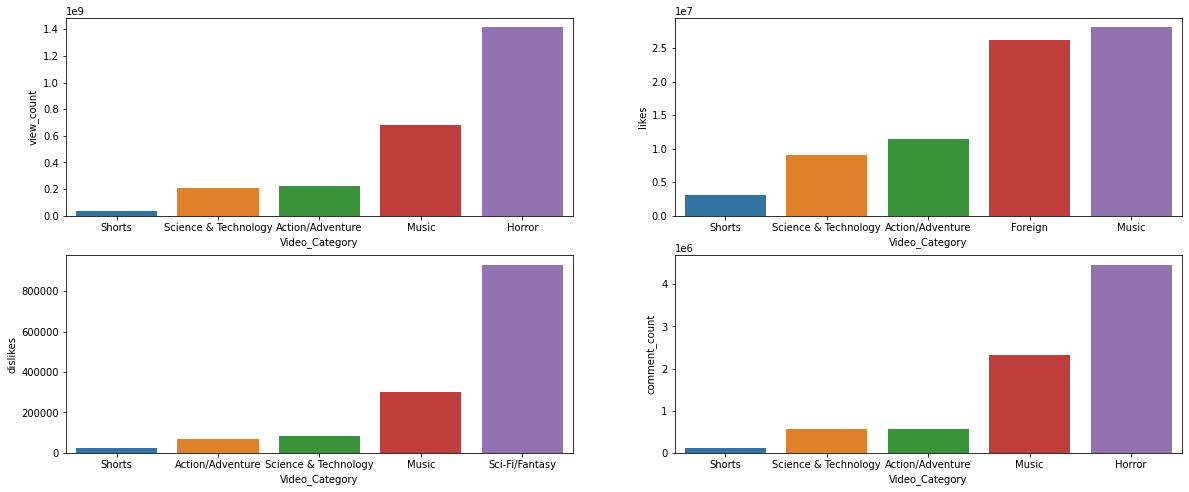

In [ ]:
#Least watch category
#Plotting the 5 categories with smallest view_count, likes, dislikes, comment_count
plt.figure(figsize  = (20,8))
plt.subplot(2,2,1)

#var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
  plt.subplot(2,2,i+1)
  x = category_group_df[var_list[i]].nsmallest(5).index
  y = category_group_df[var_list[i]].nsmallest(5)
  sns.barplot(x = x, y = y)

**Short** are the least watched and the least comment as well.

# Follow Up Analysis

But is that the right way of analysis
1. Dislikes would be more as there  are more views. Shouldn't we consider the percentage?
2. Does highest views say that the public are highly interested in watching  those Category videos?

Usually in most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.

Let's create a Response percentage column which signifies the public responses to a video and engagement between the viewers and the video

In [ ]:
df_View_Analysis['Response_Percentage'] = round(((df_View_Analysis.Likes + df_View_Analysis.Dislikes) / df_View_Analysis.view_count)*100,2)

df_View_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage
0,Action/Adventure,217836277,11294999,66928,5.22
1,Autos & Vehicles,3198762719,129779169,1274890,4.10
2,Classics,12151157257,606804041,7120121,5.05
3,Comedy,25505564288,1469282577,19596440,5.84
4,Documentary,5841054206,319910703,5908457,5.58
5,Drama,3144941002,220095879,2196117,7.07
6,Family,18827848028,893129464,10599207,4.80
7,Foreign,1904458083,25884725,1720301,1.45
8,Horror,1377062822,66555348,1349838,4.93
9,Movies,6804810075,154788144,2711623,2.31


# Public Response vs Type of Videos

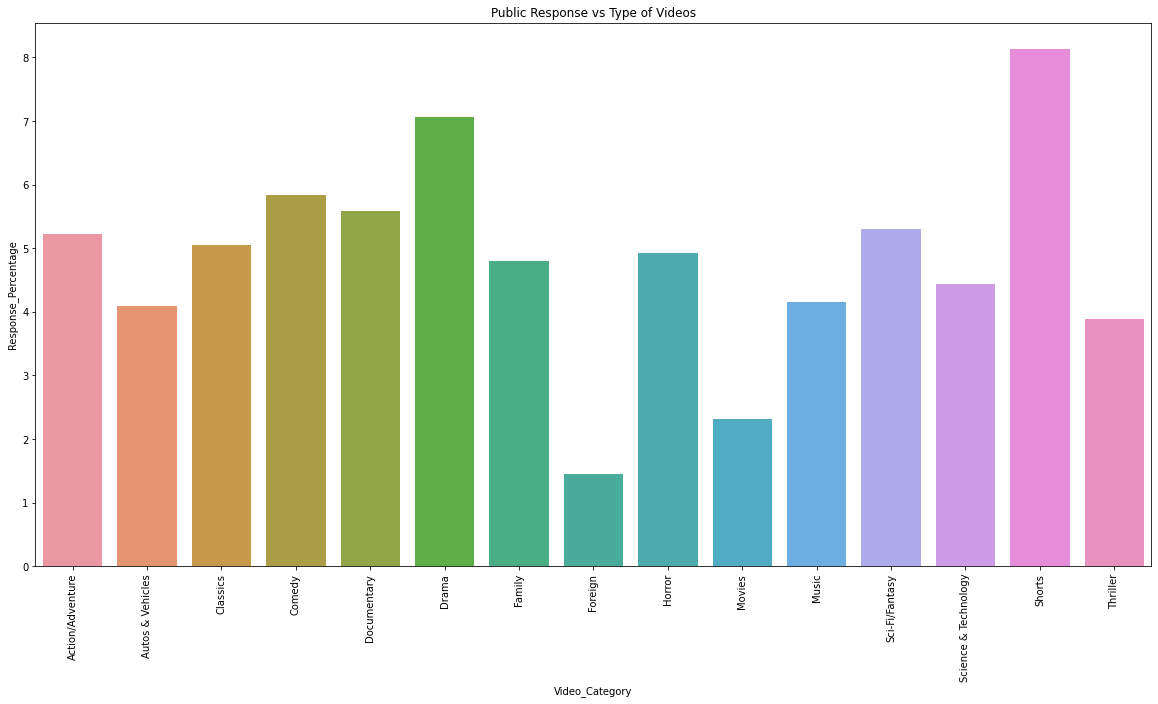

In [ ]:
plt.figure(figsize =(20,10))
plt.title("Public Response vs Type of Videos")
plt.xticks(rotation =90)
plt.ylabel("Public Response (%)")

sns.barplot (x = df_View_Analysis.Video_Category, y = df_View_Analysis.Response_Percentage)


In [ ]:
df_maxViews[df_maxViews.Video_Category.isin(['Shorts','Drama'])].sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
68754,ZJId7pl-0bY,Brewstew - Doctor's Visit,2021-07-09 22:00:21+00:00,brewstewfilms,23,2021-07-15 00:00:00+00:00,brewstew|doctor|appointment|visit|cartoon|flas...,795314,53156,346,2692,False,False,Update: I'm still aliveMerch Store:https://tee...,Drama
40590,mY6c1N4WG5w,Casually Explained: High School,2021-02-25 14:23:00+00:00,Casually Explained,23,2021-03-06 00:00:00+00:00,envelope laser rectangle|Casually Explained|st...,1574534,137997,766,5084,False,False,Go to https://expressvpn.com/casuallyexplained...,Drama
43371,LUEX3M9OL6M,I FOUND RARE BEANIE BABIES IN MY MOM’S GARAGE!,2021-03-12 19:49:06+00:00,Colleen Ballinger,23,2021-03-20 00:00:00+00:00,colleen ballinger|colleen|ballinger|psychosopr...,1197357,46308,730,5860,False,False,I went through my entire beanie baby collectio...,Drama
98163,36ZFcLrRDHY,How Asians Pack School Lunch 2,2021-12-07 00:51:33+00:00,Steven He,23,2021-12-11 00:00:00+00:00,Steven He|Comedy|Sketches|Funny|laugh|tntl|ski...,921533,70756,346,2716,False,False,​Want FREE tickets to Japan? Use my code: STEV...,Drama
131023,B9Z_3T82Ixg,I just bet 30K on a ping pong match,2022-05-23 19:35:58+00:00,NELK,23,2022-05-25 00:00:00+00:00,[None],757719,12063,0,0,True,False,https://www.twitch.tv/nelkboys,Drama


In [ ]:
df_View_Analysis['Likes_Percentage'] = round((df_View_Analysis.Likes *100 / df_View_Analysis.view_count),2)
df_View_Analysis['Dislikes_Percentage'] = round((df_View_Analysis.Dislikes *100 / df_View_Analysis.view_count),2)
df_View_Analysis['Comments'] = df_Comments['comment_count']
df_View_Analysis['Comment_Percentage'] = round((df_View_Analysis.Comments *100 / df_View_Analysis.view_count),2)

df_View_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage,Likes_Percentage,Dislikes_Percentage,Comments,Comment_Percentage
0,Action/Adventure,217836277,11294999,66928,5.22,5.19,0.03,557062,0.26
1,Autos & Vehicles,3198762719,129779169,1274890,4.10,4.06,0.04,8640240,0.27
2,Classics,12151157257,606804041,7120121,5.05,4.99,0.06,43663032,0.36
3,Comedy,25505564288,1469282577,19596440,5.84,5.76,0.08,149980405,0.59
4,Documentary,5841054206,319910703,5908457,5.58,5.48,0.10,18375461,0.31
5,Drama,3144941002,220095879,2196117,7.07,7.00,0.07,10193198,0.32
6,Family,18827848028,893129464,10599207,4.80,4.74,0.06,53481188,0.28
7,Foreign,1904458083,25884725,1720301,1.45,1.36,0.09,6516066,0.34
8,Horror,1377062822,66555348,1349838,4.93,4.83,0.10,4309884,0.31
9,Movies,6804810075,154788144,2711623,2.31,2.27,0.04,13258211,0.19


<Figure size 1440x720 with 0 Axes>

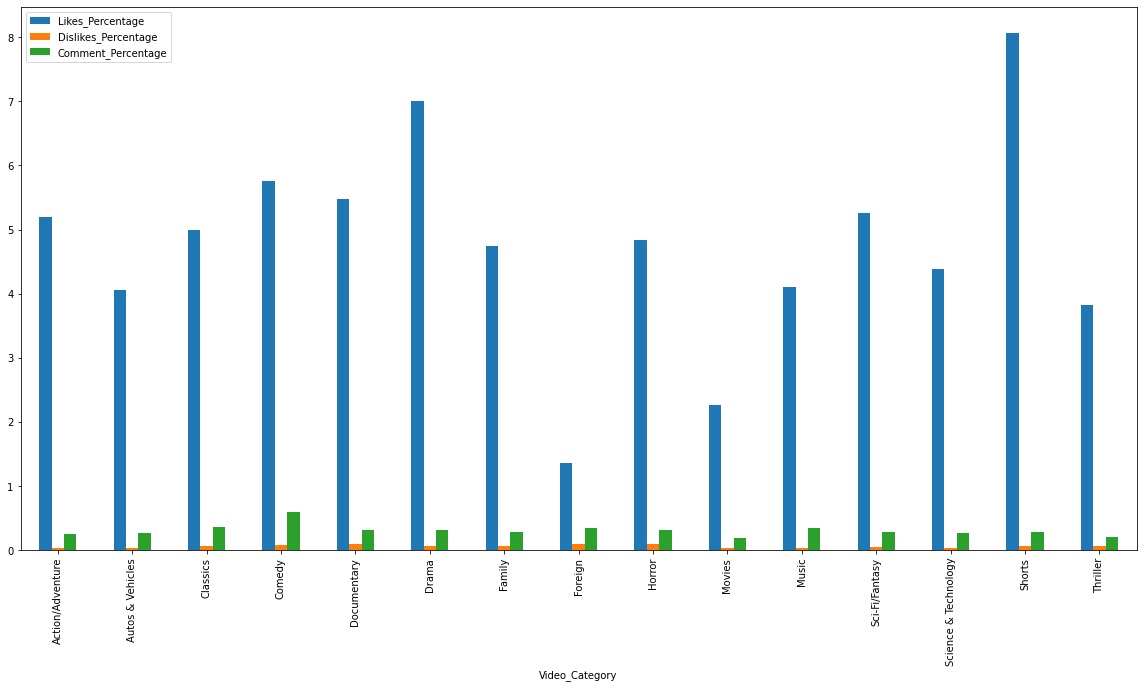

In [ ]:
plt.figure (figsize = (20,10))

df_View_Analysis.plot(x = 'Video_Category', y = ['Likes_Percentage','Dislikes_Percentage','Comment_Percentage'], kind = 'bar', figsize = (20,10))

# Comment_Percentage vs Type of Videos

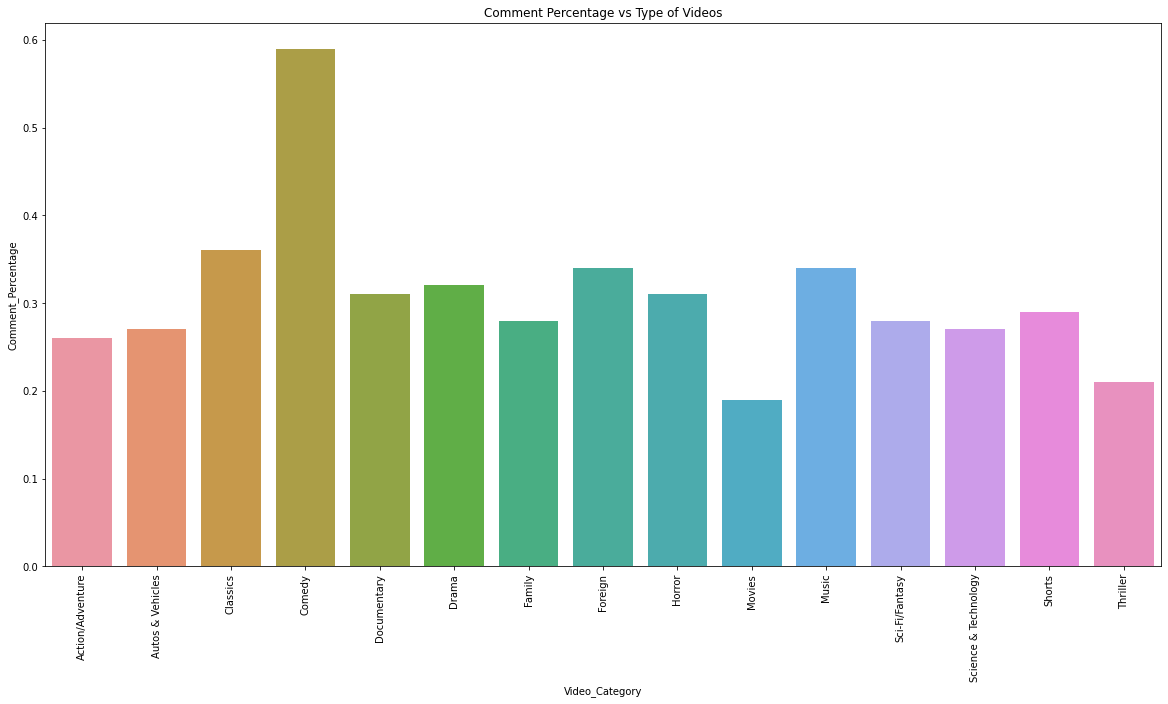

In [ ]:
plt.figure(figsize =(20,10))
plt.title("Comment Percentage vs Type of Videos")
plt.xticks(rotation =90)
plt.ylabel("comment Percentage (%)")

sns.barplot (x = df_View_Analysis.Video_Category, y = df_View_Analysis.Comment_Percentage)

# Dislikes Percentage vs Type of Video

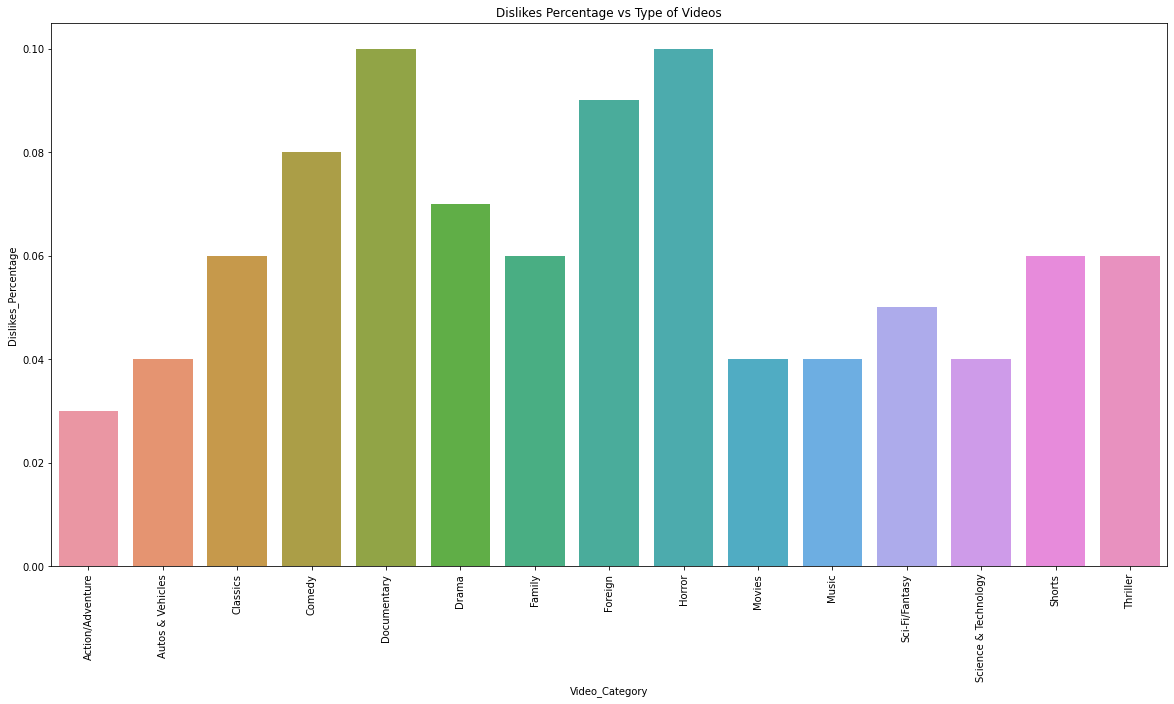

In [ ]:
plt.figure(figsize =(20,10))
plt.title("Dislikes Percentage vs Type of Videos")
plt.xticks(rotation =90)
plt.ylabel("Dislike Percentage (%)")

sns.barplot (x = df_View_Analysis.Video_Category, y = df_View_Analysis.Dislikes_Percentage)

# Likes Percentage vs Type of Video

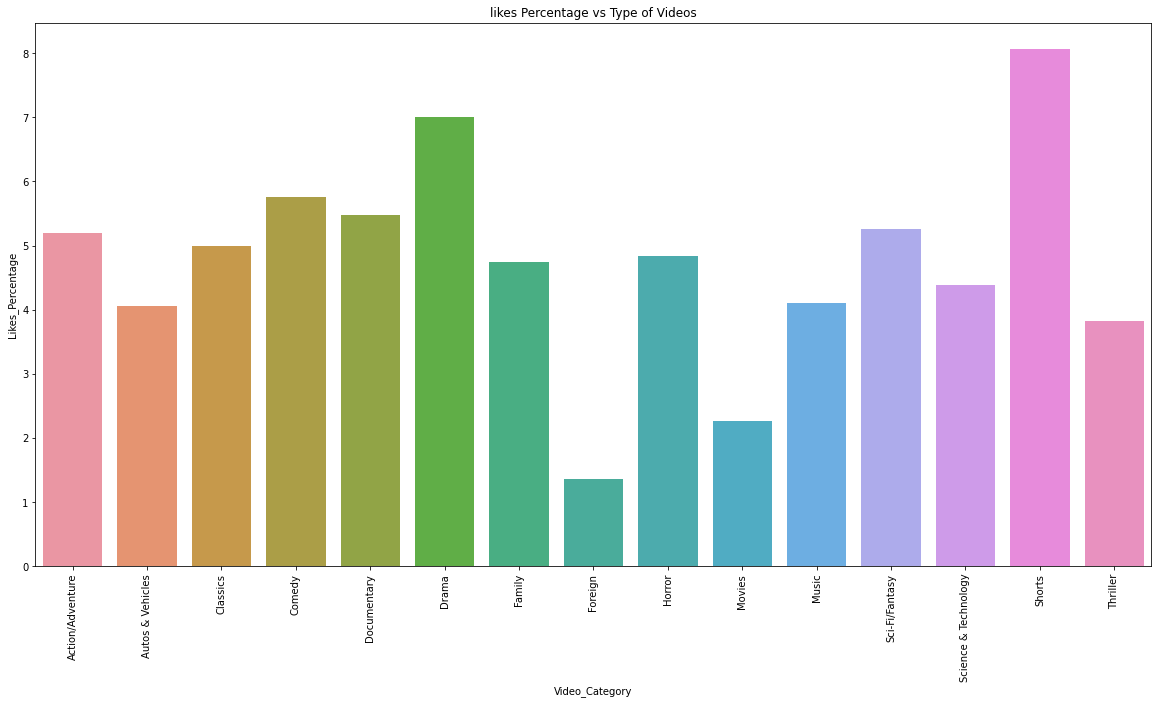

In [ ]:
plt.figure(figsize =(20,10))
plt.title("likes Percentage vs Type of Videos")
plt.xticks(rotation =90)
plt.ylabel("Likes Percentage (%)")

sns.barplot (x = df_View_Analysis.Video_Category, y = df_View_Analysis.Likes_Percentage)

# Channel Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32723 entries, 13 to 172989
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           32723 non-null  object             
 1   title              32723 non-null  object             
 2   publishedAt        32723 non-null  datetime64[ns, UTC]
 3   channelTitle       32723 non-null  object             
 4   categoryId         32723 non-null  int64              
 5   trending_date      32723 non-null  datetime64[ns, UTC]
 6   tags               32723 non-null  object             
 7   view_count         32723 non-null  int64              
 8   likes              32723 non-null  int64              
 9   dislikes           32723 non-null  int64              
 10  comment_count      32723 non-null  int64              
 11  comments_disabled  32723 non-null  bool               
 12  ratings_disabled   32723 non-null  bool     

In [ ]:
df_Channel = df_maxViews.groupby('channelTitle')['view_count'].sum().reset_index()
df_Likes = df_maxViews.groupby('channelTitle')['likes'].sum().reset_index()
df_Dislikes = df_maxViews.groupby('channelTitle')['dislikes'].sum().reset_index()
df_Comments = df_maxViews.groupby('channelTitle')['comment_count'].sum().reset_index()

df_Channel['Likes'] = df_Likes.likes
df_Channel['Dislikes'] = df_Dislikes.dislikes
df_Channel['Comments'] = df_Comments.comment_count

df_Channel.sample(5)

In [ ]:
Channel_Views = df_Channel.sort_values('view_count',ascending = False).iloc[:25,:]

# Channels vs Total Views

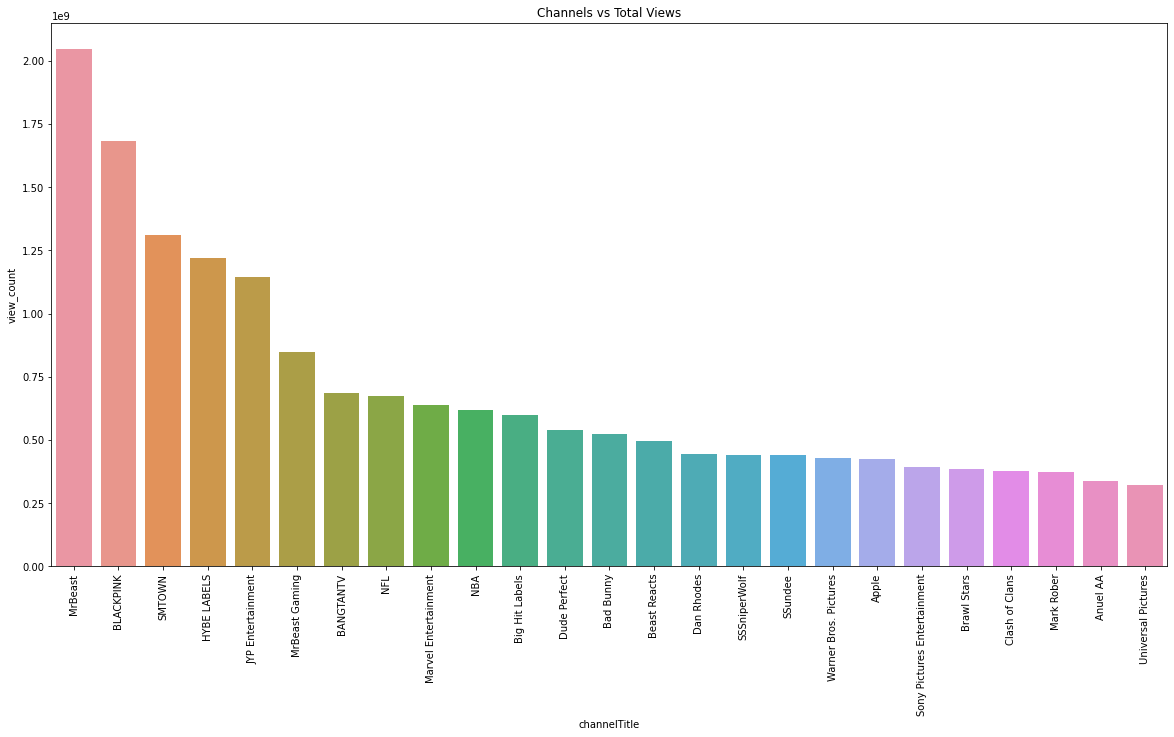

In [ ]:
plt.figure(figsize =(20,10))
plt.title("Channels vs Total Views")
plt.xticks(rotation =90)
plt.ylabel("Total Views (x 1 Billion)")
plt.xlabel("Channel Title)")

sns.barplot (x = Channel_Views.channelTitle, y = Channel_Views.view_count)

In [ ]:
Channel_Views [Channel_Views['view_count'] == Channel_Views['view_count'].max()]

,channelTitle,view_count,Likes,Dislikes,Comments
3886,MrBeast,2047966268,125030205,928195,7154047


# Channel vs Total Comments

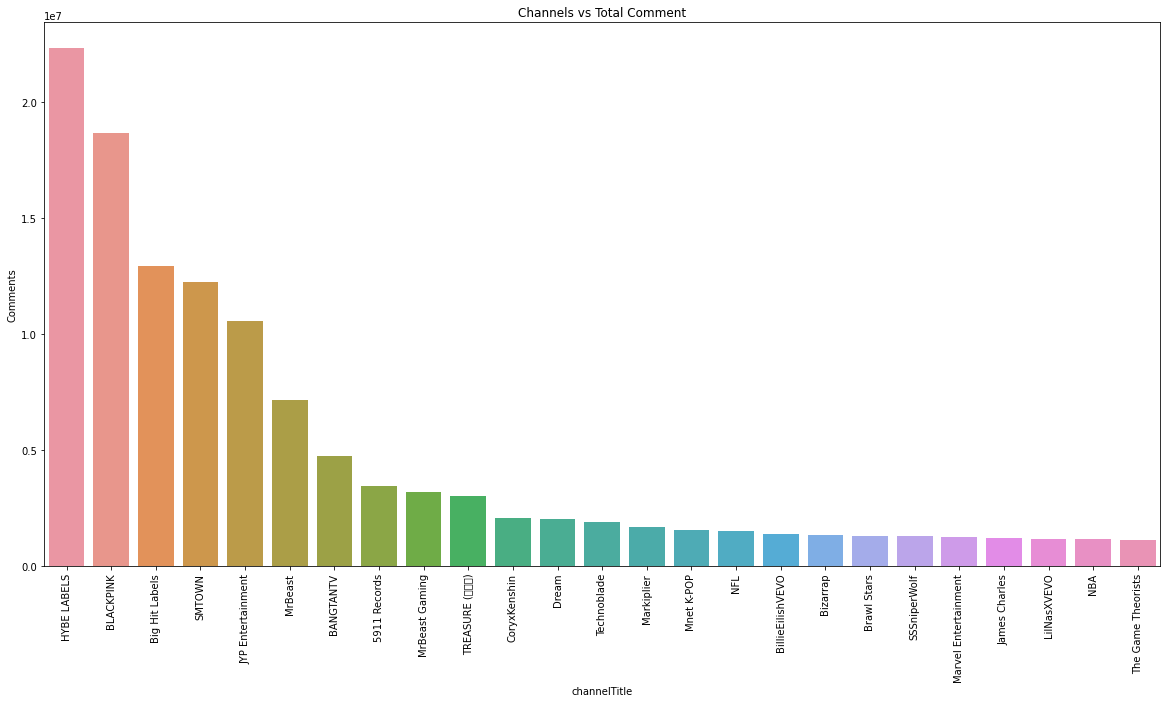

In [ ]:
Channel_Views = df_Channel.sort_values('Comments',ascending = False).iloc[:25,:]

plt.figure(figsize =(20,10))
plt.title("Channels vs Total Comment")
plt.xticks(rotation =90)
plt.ylabel("Total Comment")
plt.xlabel("Channel Title)")

sns.barplot (x = Channel_Views.channelTitle, y = Channel_Views.Comments)

# Video Trending analysis

In [ ]:
NoOfDaysInTrending = dict (df.groupby('video_id')['view_count'].count())
NoOfDaysInTrending

In [ ]:
def fetch_video_times(value):
  return NoOfDaysInTrending[value]

In [ ]:
#df_maxViews.drop(df_maxViews [df_maxViews['video_id'] == 'HR1ig6u9-6A'].index, inplace = True)
df_maxViews['title']

152788                         BLACKPINK - ‘Pink Venom’ M/V
56374                      BTS (방탄소년단) 'Butter' Official MV
3358                     BTS (방탄소년단) 'Dynamite' Official MV
73564                   Turn into orbeez - Tutorial #Shorts
4980        BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
                                ...                        
51161                                 Earth Day 2021 Doodle
65985     Gay And Not Proud - Daniel Howell | YouTube Pr...
15577             HBCU Homecoming 2020: Meet Me On The Yard
104756                      Stephen Hawking's 80th Birthday
80754                          Tim Bergling's 32nd Birthday
Name: title, Length: 31747, dtype: object

In [ ]:
df_maxViews["Time_In_Trending"] = df_maxViews.video_id.apply(fetch_video_times)
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,Time_In_Trending
105987,zD1tYb5CsZ4,I Performed Insane Experiments on Bonnie in BO...,2022-01-12 22:25:12+00:00,Jeaire,20,2022-01-19 00:00:00+00:00,i performed insane experiments on bonnie in bo...,2188210,25239,0,1193,False,False,Welcome back to BONEWORKS VR! Today's test sub...,Classics,1
70175,MXJNic6gOlY,Quadeca Reacts to the KSI ALBUM...,2021-07-16 13:37:57+00:00,Quadeca Exclusives,22,2021-07-22 00:00:00+00:00,KSI QUADECA|Albumn|reaction|all over the place...,666196,40865,348,1959,False,False,In this video I (Quadeca) react /review KSI ne...,Documentary,1
2396,ytN366VCGls,Why You Shouldn't Eat Clean: How To Lose Fat M...,2020-08-16 15:04:46+00:00,Jeff Nippard,24,2020-08-23 00:00:00+00:00,full day of eating|how to get ripped|what to e...,404092,28767,730,2319,False,False,A recent survey showed that 88% of people view...,Family,1
1171,JeqNGzsOEaw,UFC 252 Embedded: Vlog Series - Episode 4,2020-08-13 17:13:21+00:00,UFC - Ultimate Fighting Championship,17,2020-08-17 00:00:00+00:00,ufc|ultimate|fighting|championship|champion|ch...,805346,13231,265,2379,False,False,Daniel Cormier runs on an anti-gravity treadmi...,Movies,1
73380,kaWqF-F5-3M,Arizona's MyKayla Skinner wins silver!,2021-08-01 22:11:49+00:00,12 News,25,2021-08-07 00:00:00+00:00,olympics|ott|sports|valley|mykayla skinner|tok...,214113,1956,84,369,False,False,MyKayla thought her journey in Tokyo was over ...,Foreign,1


In [ ]:
df_trend_video_tt = df_maxViews.sort_values('Time_In_Trending', ascending =False).iloc[:30,:]
df_trend_video_tt

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,Time_In_Trending
25994,jALIaTTEHQU,I Surprised Zach King With A Custom Van - Tik Tok,2020-12-14 21:01:53+00:00,ZHC,24,2020-12-22 00:00:00+00:00,[None],5507509,261802,4065,19715,False,False,Watch till the end to see if we survived! We c...,Family,6
27986,WQ8Xgp8ALFo,Haircut machine V2: future of haircutting?,2020-12-22 16:07:20+00:00,Stuff Made Here,28,2021-01-02 00:00:00+00:00,stuff made here|haircut robot|invention|quaran...,1780427,90942,1028,6325,False,False,The first 1000 people to use this link will ge...,Thriller,6
63535,jnIX8S3yR-s,Ranking the Weird Aussie Animals In My Yard!,2021-06-12 20:00:06+00:00,I did a thing,24,2021-06-17 00:00:00+00:00,animals|science|i did a thing|australia|austra...,1024400,92566,729,5739,False,False,Download Lords Mobile to win BIG prizes here: ...,Family,5
134582,7VzDrqjhcXs,Wakeboarding Behind Remote Controlled Boats,2022-06-04 14:00:09+00:00,Dude Perfect,17,2022-06-11 00:00:00+00:00,dude perfect|dude perfect stereotypes|dude per...,5226465,292738,0,6248,False,False,"WE DID IT! Coby wakeboards behind RC boats, pl...",Movies,5
147185,dSApuNHkVnA,I Trapped The Rarest Mobs in Minecraft Hardcore,2022-08-05 19:53:11+00:00,Beppo,20,2022-08-13 00:00:00+00:00,minecraft|hardcore|survival|wadzee|sandiction,2575215,61772,0,5480,False,False,I Collected Minecraft's RAREST Mobs in Hardcor...,Classics,4
166581,MaEjzRaO87w,I Customized A Cafe!,2022-11-11 15:00:23+00:00,ZHC,24,2022-11-18 00:00:00+00:00,Cafe|Drive Thru,1396078,50714,0,3136,False,False,I can't believe we customized a cafe and opene...,Family,4
115754,KXg-5yerzq0,Minecraft But I Transform The ENTIRE Game - Th...,2022-03-03 18:00:05+00:00,TrixyBlox,20,2022-03-09 00:00:00+00:00,TrixyBlox|Minecraft|The Minecraft Ultimate Sur...,1536351,156601,0,5259,False,False,Download Dragon City for free and claim your s...,Classics,4
7928,g3ZPUUQoYo8,Custom Lamborghini Vs Tesla Race - Winner Keep...,2020-09-14 20:00:10+00:00,ZHC,24,2020-09-20 00:00:00+00:00,[None],3902763,157141,6444,14175,False,False,Custom Lamborghini Vs Tesla Race - Winner Keep...,Family,4
99765,d6tgmGqXysM,Hands Free Autopilot Test,2021-12-14 14:15:09+00:00,CGP Grey,28,2021-12-19 00:00:00+00:00,cgpgrey|driving|tesla|beta|technology|north ca...,608423,36163,0,2590,False,False,"- Thank you, Bonnie Bees, for making this vide...",Thriller,4
159758,d0riFA--nQI,I Broke 10 Impossible Minecraft Records!,2022-10-09 12:10:51+00:00,Dom,20,2022-10-15 00:00:00+00:00,Dom|dom minecraft|bigboydom|bigboydom yt|minec...,480354,12904,0,500,False,False,I Broke 10 Impossible Minecraft Records!! This...,Classics,4


# Channels vs No of Time in Trending

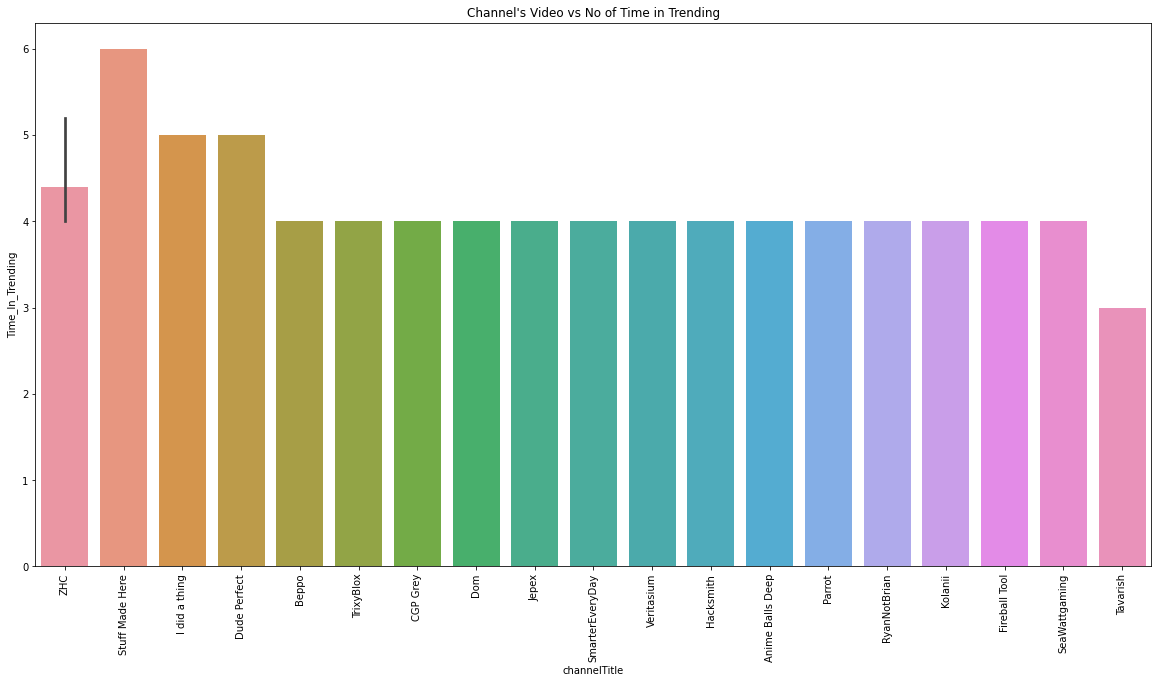

In [ ]:
plt.figure(figsize =(20,10))
plt.title("Channels vs No of Time in Trending")
plt.xticks(rotation =90)
plt.ylabel("No of Time in Trending")
plt.xlabel("Channel's Title)")

sns.barplot (x = df_trend_video_tt.channelTitle, y = df_trend_video_tt.Time_In_Trending)

In [ ]:
df_Channel_Trending = df_maxViews.groupby('channelTitle')['Time_In_Trending'].sum().reset_index()
df_Channel_Trending['Videos_Category_Type'] = df_maxViews.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]
df_Channel_Trending = df_Channel_Trending.sort_values ('Time_In_Trending', ascending = False).iloc[:30,:]
df_Channel_Trending

,channelTitle,Time_In_Trending,Videos_Category_Type
3975,NFL,297,Movies
3946,NBA,281,Movies
3955,NBC Sports,116,Movies
4870,SSundee,103,Classics
1670,ESPN,90,Movies
4869,SSSniperWolf,84,Family
4945,Saturday Night Live,81,Family
3888,MrBeast Gaming,75,Classics
6096,Veritasium,74,Sci-Fi/Fantasy
1627,Dude Perfect,73,Movies


# Channels vs Total No of Time in Trending

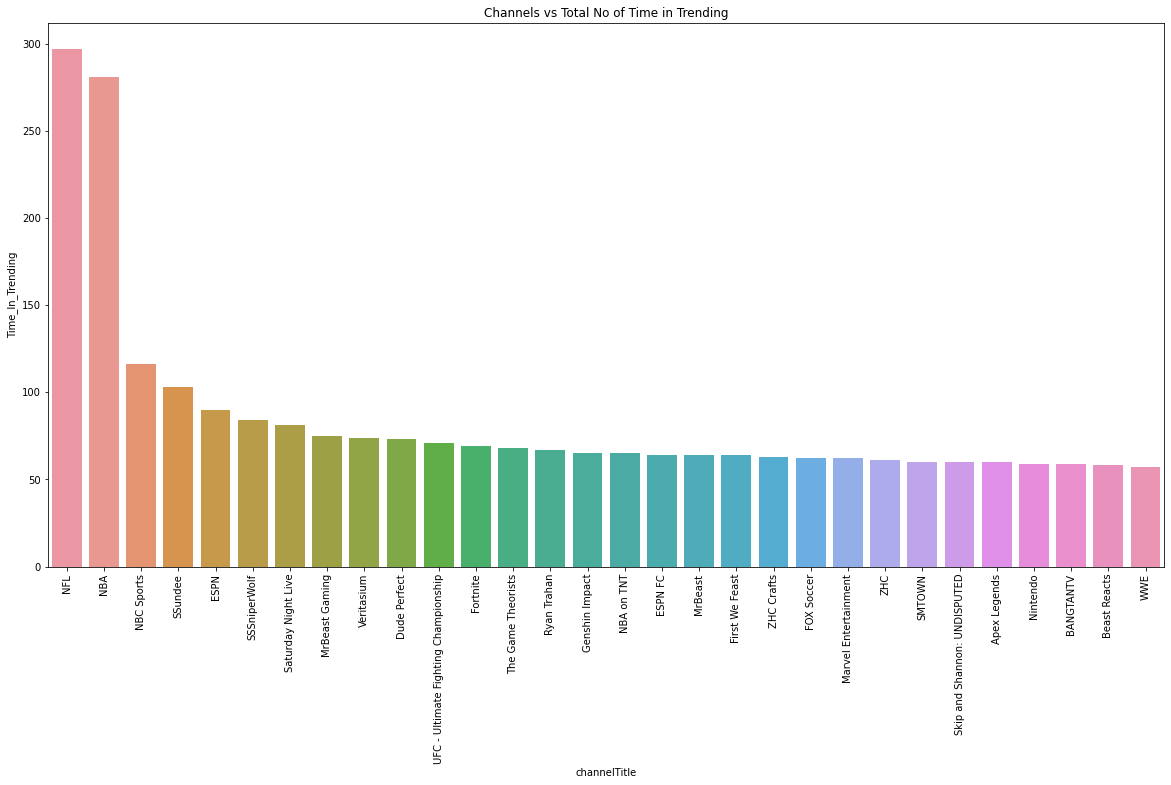

In [ ]:
#Channel vs total No of Time in Trending

plt.figure(figsize =(20,10))
plt.title("Channels vs Total No of Time in Trending")
plt.xticks(rotation =90)
plt.ylabel("Total No of Time in Trending")
plt.xlabel("Channel's Title")

sns.barplot (x = df_Channel_Trending.channelTitle, y = df_Channel_Trending.Time_In_Trending)

# Category vs Total No of Time in Trending

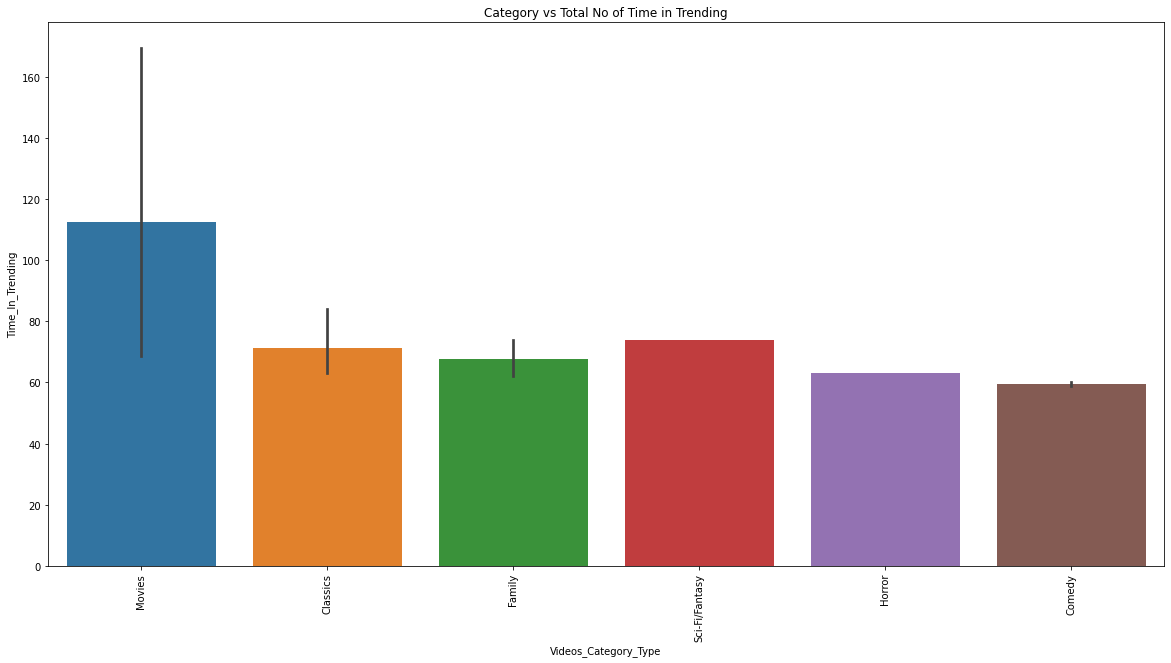

In [ ]:
plt.figure(figsize =(20,10))
plt.title("Category vs Total No of Time in Trending")
plt.xticks(rotation =90)
plt.ylabel("Total No of Time in Trending")
plt.xlabel("Category")

sns.barplot (x = df_Channel_Trending.Videos_Category_Type, y = df_Channel_Trending.Time_In_Trending)

Create a column which calculates no of days took for the video to be in Trending. 0 being less than 24 hours.

In [ ]:
df_minViews.trending_date

73992    2021-08-11 00:00:00+00:00
65774    2021-06-30 00:00:00+00:00
65985    2021-07-01 00:00:00+00:00
137965   2022-06-28 00:00:00+00:00
15577    2020-10-29 00:00:00+00:00
                    ...           
4980     2020-09-05 00:00:00+00:00
73564    2021-08-08 00:00:00+00:00
3358     2020-08-28 00:00:00+00:00
56374    2021-05-30 00:00:00+00:00
152788   2022-09-10 00:00:00+00:00
Name: trending_date, Length: 31747, dtype: datetime64[ns, UTC]

In [ ]:
#df_minViews ['JoinedTrending'] = pd.to_datetime(df_minViews.trending_date.str.split(',\s*').str[0]) # \s* = matches any white space character
#df_minViews ['UploadedTime'] = pd.to_datetime(df_minViews.publishedAt.str.split(',\s*').str[0])
#df_minViews ['DaysTakenToBeOnTrending'] = (df_minViews['JoinedTrending'] - df_minViews['UploadedTime']).dt.days
#df_minViews ['DaysTakenToBeOnTrending'] = df_minViews['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)
#df_minViews.sample(10)